# Transformación y cálculo de indicadores SEPIID

Análisis de datos exploratorio de los registros consultados en el portal de datos abiertos de la Dirección General de Estadística Judicial,
que pueden ser consultadas en: https://www.dgej.cjf.gob.mx/paginas/estadisticasEnv.htm?pageName=estadisticas%2FpersonalDatosAbiertos.htm
## Objectivos

* Transformar las variables claves
* Estadísticas descriptivas
* Aglomerar las columnas que se requieren para el cálculo de los siguientes indicadores:
1. Distribución porcentual de los distintos ingresos salariales por sexo
2. Porcentaje de mujeres y hombres en cargos titulares en el ámbito jurisdiccional y administrativo
3. Porcentaje de mujeres y hombres en los cuerpos colegiados (comisiones, Pleno del CJF, comités)
4. Porcentaje de ocupación por sexo de los cargos de mando medio y superior en el CJF
Consultar el diccionario de datos de la base de datos en: https://docs.google.com/spreadsheets/d/17GZsKvYDVkK2Wo5ydhHyoCs4bDcrg-VInfmoyuxEaPI/edit?gid=404889619#gid=404889619



In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Para cargar un archivo CSV, deberá cambiar la dirección.
df = pd.read_csv('/Users/karlacruz/Desktop/MIDI/BD/TableroPersonalCJF.csv')


In [7]:
#Muestra las primeras 5 observaciones de todas la columnas
# La base no contempla al personal de la Suprema Corte de Justicia de la Nación, al Tribunal Electoral Federal y al Comité Técnico del Fondo de Apoyo a la Administración de Justicia
# los trabajadores del Consejo de la Judicatura Federal (Consejo o CJF), tanto los que laboran en las áreas administrativas como en los órganos jurisdiccionales, incluyendolos plenos de circuito y órganos de apoyo (auxiliares)
df.head(5)

,Unnamed: 0,periodo,cve_pjf,desc_pjf,nom_adscripcion,cve_tp_adscripcion,desc_tp_adscripcion,cve_circuito,desc_circuito,cve_jurisdiccion,...,desc_org_aux,defensoria,cve_tp_defensoria,desc_tp_defensoria,trab,dias,masa_bruta,masa_neta,adscripcion,desc_tp_Defensoria
0,0,201501,1,Consejo,10MO TRIBUNAL COLEGIADO EN MATERIA ADMINISTRAT...,OJ,Órganos jurisdiccionales,1,1° Circuito,01_01,...,No aplica,0.0,0.0,No aplica,1.0,31.0,"205,138.75","141,820.81",0.0,NaN
1,1,201501,1,Consejo,10MO TRIBUNAL COLEGIADO EN MATERIA ADMINISTRAT...,OJ,Órganos jurisdiccionales,1,1° Circuito,01_01,...,No aplica,0.0,0.0,No aplica,1.0,31.0,"205,138.75","141,820.81",0.0,NaN
2,2,201501,1,Consejo,10MO TRIBUNAL COLEGIADO EN MATERIA ADMINISTRAT...,OJ,Órganos jurisdiccionales,1,1° Circuito,01_01,...,No aplica,0.0,0.0,No aplica,1.0,31.0,"205,138.75","141,820.81",0.0,NaN
3,3,201501,1,Consejo,10MO TRIBUNAL COLEGIADO EN MATERIA ADMINISTRAT...,OJ,Órganos jurisdiccionales,1,1° Circuito,01_01,...,No aplica,0.0,0.0,No aplica,1.0,31.0,"50,850.10","37,548.15",0.0,NaN
4,4,201501,1,Consejo,10MO TRIBUNAL COLEGIADO EN MATERIA ADMINISTRAT...,OJ,Órganos jurisdiccionales,1,1° Circuito,01_01,...,No aplica,0.0,0.0,No aplica,1.0,31.0,"50,850.10","37,548.15",0.0,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2970321 entries, 0 to 2970320
Data columns (total 63 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   periodo                 int64  
 2   cve_pjf                 int64  
 3   desc_pjf                object 
 4   nom_adscripcion         object 
 5   cve_tp_adscripcion      object 
 6   desc_tp_adscripcion     object 
 7   cve_circuito            int64  
 8   desc_circuito           object 
 9   cve_jurisdiccion        object 
 10  desc_jurisdiccion       object 
 11  cve_centro_aux_region   int64  
 12  desc_centro_aux_region  object 
 13  cve_entidad             object 
 14  desc_entidad            object 
 15  cve_localidad           object 
 16  desc_localidad          object 
 17  latitud                 float64
 18  longitud                float64
 19  domicilio               object 
 20  cve_tp_organo           int64  
 21  desc_tp_organo          object 

In [11]:
#Selección de variables para los indicadores: 
indicadores= [ 'periodo',
'nom_adscripcion',
'cve_tp_adscripcion',
'desc_tp_adscripcion',
'cve_circuito',
'desc_circuito',
'cve_jurisdiccion',
'desc_jurisdiccion',
'desc_centro_aux_region',
'desc_entidad',
'desc_localidad',
'latitud',
'longitud',
'domicilio',
'desc_tp_organo_largo',
'desc_especialidad',
'desc_tp_contrato',
'tpo_nomb',
'desc_jerarquia',
'nom_puesto',
'cve_gpo_puesto',
'desc_gpo_puesto',
'desc_rama_puesto',
'desc_genero',
'nom_grado',
'desc_rango_edad',
'desc_tp_area',
'desc_tp_unidad',
'desc_org_aux',
'defensoria',
'desc_tp_defensoria',
'trab',
'dias',
'masa_bruta',
'masa_neta']


In [13]:
#Crea la base exclusiva para los indicadores.
df_1 = df[indicadores]

In [15]:
#Resumen de las columnas
print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2970321 entries, 0 to 2970320
Data columns (total 35 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   periodo                 int64  
 1   nom_adscripcion         object 
 2   cve_tp_adscripcion      object 
 3   desc_tp_adscripcion     object 
 4   cve_circuito            int64  
 5   desc_circuito           object 
 6   cve_jurisdiccion        object 
 7   desc_jurisdiccion       object 
 8   desc_centro_aux_region  object 
 9   desc_entidad            object 
 10  desc_localidad          object 
 11  latitud                 float64
 12  longitud                float64
 13  domicilio               object 
 14  desc_tp_organo_largo    object 
 15  desc_especialidad       object 
 16  desc_tp_contrato        object 
 17  tpo_nomb                object 
 18  desc_jerarquia          object 
 19  nom_puesto              object 
 20  cve_gpo_puesto          int64  
 21  desc_gpo_puesto         object 

In [17]:
#Convertir el tipo de variable a la apropiada

def convertir_salario(valor):
    import pandas as pd

    if pd.isnull(valor):
        return None

    valor = str(valor).strip()

    # Caso mixto: punto y coma
    if ',' in valor and '.' in valor:
        if valor.find(',') < valor.find('.'):
            # formato inglés: 1,234.56
            valor = valor.replace(',', '')
        else:
            # formato europeo: 1.234,56
            valor = valor.replace('.', '').replace(',', '.')
    elif ',' in valor:
        # Solo coma:  decimal
        valor = valor.replace(',', '.')
    elif '.' in valor:
        # Solo punto:  decimal (nada que hacer)
        pass

    try:
        return float(valor)
    except ValueError:
        return None  # o puedes registrar/loguear el error

In [19]:
df_1['salario_bruto'] = df_1['masa_bruta'].apply(convertir_salario)
df_1['salario_neto'] = df_1['masa_neta'].apply(convertir_salario)

/var/folders/l9/s2sfg4c5697cq1_mybf2ntl00000gn/T/ipykernel_1194/199906052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['salario_bruto'] = df_1['masa_bruta'].apply(convertir_salario)
/var/folders/l9/s2sfg4c5697cq1_mybf2ntl00000gn/T/ipykernel_1194/199906052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['salario_neto'] = df_1['masa_neta'].apply(convertir_salario)


In [ ]:
#df_1= df_1.drop('Tiempo',axis=1)

In [21]:
#Crear año y mes
df_1[["Tiempo"]] = df_1[["periodo"]].astype("str")
df_1['año'] = df_1['Tiempo'].str[0:4]
df_1['mes'] = df_1['Tiempo'].str[4:6]

/var/folders/l9/s2sfg4c5697cq1_mybf2ntl00000gn/T/ipykernel_1194/3095118603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[["Tiempo"]] = df_1[["periodo"]].astype("str")
/var/folders/l9/s2sfg4c5697cq1_mybf2ntl00000gn/T/ipykernel_1194/3095118603.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['año'] = df_1['Tiempo'].str[0:4]
/var/folders/l9/s2sfg4c5697cq1_mybf2ntl00000gn/T/ipykernel_1194/3095118603.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [23]:
df_1['dia_bruto'] = df_1['salario_bruto']/ df_1['dias'] 
df_1['dia_neto'] = df_1['salario_neto']/ df_1['dias'] 

/var/folders/l9/s2sfg4c5697cq1_mybf2ntl00000gn/T/ipykernel_1194/751112358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['dia_bruto'] = df_1['salario_bruto']/ df_1['dias']
/var/folders/l9/s2sfg4c5697cq1_mybf2ntl00000gn/T/ipykernel_1194/751112358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['dia_neto'] = df_1['salario_neto']/ df_1['dias']


In [25]:
#redondeo de valores
df_1[['dia_neto', 'dia_bruto']] = df_1[['dia_neto', 'dia_bruto']].round(2)

/var/folders/l9/s2sfg4c5697cq1_mybf2ntl00000gn/T/ipykernel_1194/2761743301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[['dia_neto', 'dia_bruto']] = df_1[['dia_neto', 'dia_bruto']].round(2)


In [27]:
#Verifican las variables creadas
df_1.head(5)

,periodo,nom_adscripcion,cve_tp_adscripcion,desc_tp_adscripcion,cve_circuito,desc_circuito,cve_jurisdiccion,desc_jurisdiccion,desc_centro_aux_region,desc_entidad,...,dias,masa_bruta,masa_neta,salario_bruto,salario_neto,Tiempo,año,mes,dia_bruto,dia_neto
0,201501,10MO TRIBUNAL COLEGIADO EN MATERIA ADMINISTRAT...,OJ,Órganos jurisdiccionales,1,1° Circuito,01_01,1° Circuito: Jurisdicción 1,No aplica,Distrito Federal,...,31.0,"205,138.75","141,820.81",205138.75,141820.81,201501,2015,01,6617.38,4574.86
1,201501,10MO TRIBUNAL COLEGIADO EN MATERIA ADMINISTRAT...,OJ,Órganos jurisdiccionales,1,1° Circuito,01_01,1° Circuito: Jurisdicción 1,No aplica,Distrito Federal,...,31.0,"205,138.75","141,820.81",205138.75,141820.81,201501,2015,01,6617.38,4574.86
2,201501,10MO TRIBUNAL COLEGIADO EN MATERIA ADMINISTRAT...,OJ,Órganos jurisdiccionales,1,1° Circuito,01_01,1° Circuito: Jurisdicción 1,No aplica,Distrito Federal,...,31.0,"205,138.75","141,820.81",205138.75,141820.81,201501,2015,01,6617.38,4574.86
3,201501,10MO TRIBUNAL COLEGIADO EN MATERIA ADMINISTRAT...,OJ,Órganos jurisdiccionales,1,1° Circuito,01_01,1° Circuito: Jurisdicción 1,No aplica,Distrito Federal,...,31.0,"50,850.10","37,548.15",50850.10,37548.15,201501,2015,01,1640.33,1211.23
4,201501,10MO TRIBUNAL COLEGIADO EN MATERIA ADMINISTRAT...,OJ,Órganos jurisdiccionales,1,1° Circuito,01_01,1° Circuito: Jurisdicción 1,No aplica,Distrito Federal,...,31.0,"50,850.10","37,548.15",50850.10,37548.15,201501,2015,01,1640.33,1211.23


In [29]:
#Separación entre áreas administrativas y órganos jurisdiccionales
#Crea la base para personal de los órganos jurisdiccionales
df_OJ = df_1[df_1['cve_tp_adscripcion'] == 'OJ']
df_OJ.head()

,periodo,nom_adscripcion,cve_tp_adscripcion,desc_tp_adscripcion,cve_circuito,desc_circuito,cve_jurisdiccion,desc_jurisdiccion,desc_centro_aux_region,desc_entidad,...,dias,masa_bruta,masa_neta,salario_bruto,salario_neto,Tiempo,año,mes,dia_bruto,dia_neto
0,201501,10MO TRIBUNAL COLEGIADO EN MATERIA ADMINISTRAT...,OJ,Órganos jurisdiccionales,1,1° Circuito,01_01,1° Circuito: Jurisdicción 1,No aplica,Distrito Federal,...,31.0,"205,138.75","141,820.81",205138.75,141820.81,201501,2015,01,6617.38,4574.86
1,201501,10MO TRIBUNAL COLEGIADO EN MATERIA ADMINISTRAT...,OJ,Órganos jurisdiccionales,1,1° Circuito,01_01,1° Circuito: Jurisdicción 1,No aplica,Distrito Federal,...,31.0,"205,138.75","141,820.81",205138.75,141820.81,201501,2015,01,6617.38,4574.86
2,201501,10MO TRIBUNAL COLEGIADO EN MATERIA ADMINISTRAT...,OJ,Órganos jurisdiccionales,1,1° Circuito,01_01,1° Circuito: Jurisdicción 1,No aplica,Distrito Federal,...,31.0,"205,138.75","141,820.81",205138.75,141820.81,201501,2015,01,6617.38,4574.86
3,201501,10MO TRIBUNAL COLEGIADO EN MATERIA ADMINISTRAT...,OJ,Órganos jurisdiccionales,1,1° Circuito,01_01,1° Circuito: Jurisdicción 1,No aplica,Distrito Federal,...,31.0,"50,850.10","37,548.15",50850.10,37548.15,201501,2015,01,1640.33,1211.23
4,201501,10MO TRIBUNAL COLEGIADO EN MATERIA ADMINISTRAT...,OJ,Órganos jurisdiccionales,1,1° Circuito,01_01,1° Circuito: Jurisdicción 1,No aplica,Distrito Federal,...,31.0,"50,850.10","37,548.15",50850.10,37548.15,201501,2015,01,1640.33,1211.23


In [31]:
#Base de las áreas administrativas
df_AA = df_1[df_1['cve_tp_adscripcion'] == 'AA']
df_AA.head()

,periodo,nom_adscripcion,cve_tp_adscripcion,desc_tp_adscripcion,cve_circuito,desc_circuito,cve_jurisdiccion,desc_jurisdiccion,desc_centro_aux_region,desc_entidad,...,dias,masa_bruta,masa_neta,salario_bruto,salario_neto,Tiempo,año,mes,dia_bruto,dia_neto
28365,201501,Área administrativa,AA,Áreas administrativas,0,No aplica,0,No aplica,No aplica,Aguascalientes,...,31.0,"23,524.26","17,800.96",23524.26,17800.96,201501,2015,01,758.85,574.22
28366,201501,Área administrativa,AA,Áreas administrativas,0,No aplica,0,No aplica,No aplica,Aguascalientes,...,31.0,"23,524.26","17,800.96",23524.26,17800.96,201501,2015,01,758.85,574.22
28367,201501,Área administrativa,AA,Áreas administrativas,0,No aplica,0,No aplica,No aplica,Aguascalientes,...,31.0,"23,524.26","17,800.96",23524.26,17800.96,201501,2015,01,758.85,574.22
28368,201501,Área administrativa,AA,Áreas administrativas,0,No aplica,0,No aplica,No aplica,Aguascalientes,...,31.0,"23,524.26","17,800.96",23524.26,17800.96,201501,2015,01,758.85,574.22
28369,201501,Área administrativa,AA,Áreas administrativas,0,No aplica,0,No aplica,No aplica,Aguascalientes,...,31.0,"23,524.26","17,800.96",23524.26,17800.96,201501,2015,01,758.85,574.22


In [33]:
# Verificar valores nulos para cada base y qué columnas no aplican.
print(df_AA.isnull().sum())
#Domicilio y desc_tp_defensoria tiene nulos

periodo                        0
nom_adscripcion                0
cve_tp_adscripcion             0
desc_tp_adscripcion            0
cve_circuito                   0
desc_circuito                  0
cve_jurisdiccion               0
desc_jurisdiccion              0
desc_centro_aux_region         0
desc_entidad                   0
desc_localidad                 0
latitud                        0
longitud                       0
domicilio                 555412
desc_tp_organo_largo           0
desc_especialidad              0
desc_tp_contrato               0
tpo_nomb                       0
desc_jerarquia                 0
nom_puesto                     0
cve_gpo_puesto                 0
desc_gpo_puesto                0
desc_rama_puesto               0
desc_genero                    0
nom_grado                      0
desc_rango_edad                0
desc_tp_area                   1
desc_tp_unidad                 1
desc_org_aux                   1
defensoria                     1
desc_tp_de

In [35]:
print(df_OJ.isnull().sum())
#solo desc_tp_defensoria tiene nulos

periodo                   0
nom_adscripcion           0
cve_tp_adscripcion        0
desc_tp_adscripcion       0
cve_circuito              0
desc_circuito             0
cve_jurisdiccion          0
desc_jurisdiccion         0
desc_centro_aux_region    0
desc_entidad              0
desc_localidad            0
latitud                   0
longitud                  0
domicilio                 0
desc_tp_organo_largo      0
desc_especialidad         0
desc_tp_contrato          0
tpo_nomb                  0
desc_jerarquia            0
nom_puesto                0
cve_gpo_puesto            0
desc_gpo_puesto           0
desc_rama_puesto          0
desc_genero               0
nom_grado                 0
desc_rango_edad           0
desc_tp_area              0
desc_tp_unidad            0
desc_org_aux              0
defensoria                0
desc_tp_defensoria        0
trab                      0
dias                      0
masa_bruta                0
masa_neta                 0
salario_bruto       

In [37]:
#Contar los valores de la base de órganos jurisdiccionales solo las objeto o categoricas
for col in df_OJ.select_dtypes(include=['object', 'category']).columns:
    print(f"--- {col} ---")
    print(df_OJ[col].value_counts(dropna=False))
    print("\n")

#No aplican las columnas: desc_tp_area , desc_tp_unidad, desc_org_aux, desc_tp_defensoria

--- nom_adscripcion ---
nom_adscripcion
CENTRO NACIONAL DE JUSTICIA ESP. EN CONTROL DE TEC. INVEST. ARRAIGO E INTERVENCIÓN DE COMUNICACIONES    13168
JZDO. 2DO. DTO. CENTRO AUXILIAR DE LA PRIMERA REGIÓN, CIUDAD DE MÉXICO                                  10002
JZDO. 1RO. DTO. CENTRO AUXILIAR DE LA PRIMERA REGIÓN, CIUDAD DE MÉXICO                                   9987
TRIBUNAL COLEGIADO DEL TRIGÉSIMO SEGUNDO CIRCUITO, EN COLIMA, COLIMA                                     7297
DECIMOSEGUNDO TRIBUNAL COLEGIADO EN MATERIA DE TRABAJO DEL PRIMER CIRCUITO                               7075
                                                                                                        ...  
JZDO. 6TO. DTO. EN MAT. MERCANTIL, ESPECIALIZADO EN JUICIOS DE CUANTÍA MENOR, ZAPOPAN, JALISCO             21
JZDO. 3RO. DTO. EN MAT. MERCANTIL, ESPECIALIZADO EN JUICIOS DE CUANTÍA MENOR ZAPOPAN, JALISCO              20
PLENO DEL DECIMOCTAVO CIRCUITO EN CUERNAVACA, MORELOS                           

In [39]:
#Borrando las columnas que no aplican o estan duplicadas para OJ
df_OJ = df_OJ.drop(['desc_tp_area' , 'desc_tp_unidad' , 'desc_org_aux' , 'desc_tp_defensoria', 'Tiempo', 'masa_bruta', 'masa_neta' ], axis=1)

In [41]:
df_OJ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4094148 entries, 0 to 5085222
Data columns (total 35 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   periodo                 int64  
 1   nom_adscripcion         object 
 2   cve_tp_adscripcion      object 
 3   desc_tp_adscripcion     object 
 4   cve_circuito            int64  
 5   desc_circuito           object 
 6   cve_jurisdiccion        object 
 7   desc_jurisdiccion       object 
 8   desc_centro_aux_region  object 
 9   desc_entidad            object 
 10  desc_localidad          object 
 11  latitud                 float64
 12  longitud                float64
 13  domicilio               object 
 14  desc_tp_organo_largo    object 
 15  desc_especialidad       object 
 16  desc_tp_contrato        object 
 17  tpo_nomb                object 
 18  desc_jerarquia          object 
 19  nom_puesto              object 
 20  cve_gpo_puesto          int64  
 21  desc_gpo_puesto         object 
 22 

In [43]:
#Contar los valores de la base de áreas administrativas solo las objeto o categoricas
for col in df_AA.select_dtypes(include=['object', 'category']).columns:
    print(f"--- {col} ---")
    print(df_AA[col].value_counts(dropna=False))
    print("\n")

#columnas que no aplica a AA desc_circuito , cve_jurisdiccion,  desc_jurisdiccion, desc_centro_aux_region, domicilio, desc_tp_organo_largo, desc_especialidad

--- nom_adscripcion ---
nom_adscripcion
Área administrativa    991075
Name: count, dtype: int64


--- cve_tp_adscripcion ---
cve_tp_adscripcion
AA    991075
Name: count, dtype: int64


--- desc_tp_adscripcion ---
desc_tp_adscripcion
Áreas administrativas    991075
Name: count, dtype: int64


--- desc_circuito ---
desc_circuito
No aplica    991075
Name: count, dtype: int64


--- cve_jurisdiccion ---
cve_jurisdiccion
0    991075
Name: count, dtype: int64


--- desc_jurisdiccion ---
desc_jurisdiccion
No aplica    991075
Name: count, dtype: int64


--- desc_centro_aux_region ---
desc_centro_aux_region
No aplica    991075
Name: count, dtype: int64


--- desc_entidad ---
desc_entidad
Ciudad de México       471756
Jalisco                 41850
Estado de México        39849
Distrito Federal        39152
Baja California         32635
Veracruz                29738
Sinaloa                 23609
Sonora                  22494
Tamaulipas              22204
Guanajuato              21810
Chihuahua    

In [45]:
#Borrando las columnas que no aplican o estan duplicadas para AA
df_AA = df_AA.drop(['desc_circuito' , 'cve_circuito', 'latitud' , 'longitud' , 'cve_jurisdiccion' , 'desc_jurisdiccion' , 'desc_centro_aux_region', 'domicilio' , 'desc_tp_organo_largo' , 'desc_especialidad' , 'Tiempo', 'masa_bruta', 'masa_neta' ], axis=1)

In [36]:
df_AA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991075 entries, 28365 to 5059080
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   periodo              991075 non-null  int64  
 1   nom_adscripcion      991075 non-null  object 
 2   cve_tp_adscripcion   991075 non-null  object 
 3   desc_tp_adscripcion  991075 non-null  object 
 4   desc_entidad         991075 non-null  object 
 5   desc_localidad       991075 non-null  object 
 6   desc_tp_contrato     991075 non-null  object 
 7   tpo_nomb             991075 non-null  object 
 8   desc_jerarquia       991075 non-null  object 
 9   nom_puesto           991075 non-null  object 
 10  cve_gpo_puesto       991075 non-null  int64  
 11  desc_gpo_puesto      991075 non-null  object 
 12  desc_rama_puesto     991075 non-null  object 
 13  desc_genero          991075 non-null  object 
 14  nom_grado            991075 non-null  object 
 15  desc_rango_edad  

In [47]:
# Estadísticas descriptivas para la base de órganos jurisdiccionales (OJ)
print(df_OJ.describe())

            periodo  cve_circuito       latitud      longitud  cve_gpo_puesto  \
count  4.094148e+06  4.094148e+06  4.094148e+06  4.094148e+06    4.094148e+06   
mean   2.019855e+05  9.455728e+00  2.148051e+01 -1.007325e+02    5.310939e+00   
std    2.935217e+02  8.791243e+00  3.831236e+00  5.147008e+00    1.022174e+00   
min    2.015010e+05  0.000000e+00  1.485400e+01 -1.170242e+02    2.000000e+00   
25%    2.017100e+05  1.000000e+00  1.934880e+01 -1.033551e+02    4.000000e+00   
50%    2.020050e+05  6.000000e+00  1.954490e+01 -9.921784e+01    6.000000e+00   
75%    2.022100e+05  1.600000e+01  2.277925e+01 -9.911391e+01    6.000000e+00   
max    2.025030e+05  3.200000e+01  3.264437e+01 -8.684873e+01    6.000000e+00   

       defensoria          trab          dias  salario_bruto  salario_neto  \
count   4094148.0  4.094148e+06  4.094148e+06   4.094148e+06  4.094148e+06   
mean          0.0  1.085705e+00  3.252136e+01   5.649620e+04  4.135469e+04   
std           0.0  3.409299e-01  1.0

In [49]:
# Estadísticas descriptivas para la base de áreas administrativas (AA)
print(df_AA.describe())

             periodo  cve_gpo_puesto     defensoria           trab  \
count  991075.000000   991075.000000  991075.000000  991075.000000   
mean   201997.375271        4.989747       0.296503       1.152994   
std       296.145930        0.136806       0.456716       0.755554   
min    201501.000000        1.000000       0.000000       1.000000   
25%    201711.000000        5.000000       0.000000       1.000000   
50%    202007.000000        5.000000       0.000000       1.000000   
75%    202301.000000        5.000000       1.000000       1.000000   
max    202503.000000        5.000000       1.000000      28.000000   

                dias  salario_bruto  salario_neto      dia_bruto  \
count  991075.000000   9.910750e+05  9.910750e+05  991075.000000   
mean       34.803939   4.968209e+04  3.699280e+04    1448.202170   
std        23.016997   4.333446e+04  3.140998e+04     968.917255   
min         1.000000   4.342200e+02  3.612500e+02     434.220000   
25%        30.000000   2.6673

# Indicadores de Paridad #
* Porcentaje de mujeres y hombres en cargos titulares en el ámbito jurisdiccional y administrativo

* Porcentaje de ocupación por sexo de los cargos de mando medio y superior en el CJF

Versión: Porcentaje de mujeres y hombres por cargo jerarquico 

In [51]:
## áreas administrativas
Paa_jerar = pd.crosstab(
    index=[df_AA['año'], df_AA['desc_jerarquia']],    # índice con año y sexo
    columns=df_AA['desc_genero'],      # columnas con rango de jerarquico
    normalize='index'                 # normaliza por fila (año+sexo)
) * 100 
Paa_jerar

desc_genero           Femenino  Masculino
año  desc_jerarquia                      
2015 Mando medio     39.070523  60.929477
     Mando superior  32.078313  67.921687
     Operativo       49.654586  50.345414
2016 Mando medio     39.192188  60.807812
     Mando superior  31.148162  68.851838
     Operativo       49.084675  50.915325
2017 Mando medio     39.624636  60.375364
     Mando superior  31.604121  68.395879
     Operativo       49.052721  50.947279
2018 Mando medio     40.302851  59.697149
     Mando superior  30.842439  69.157561
     Operativo       48.556773  51.443227
2019 Mando medio     41.385230  58.614770
     Mando superior  35.081502  64.918498
     Operativo       48.325091  51.674909
2020 Mando medio     42.782166  57.217834
     Mando superior  37.166667  62.833333
     Operativo       48.711948  51.288052
2021 Mando medio     43.199493  56.800507
     Mando superior  39.035088  60.964912
     Operativo       48.753824  51.246176
2022 Mando medio     43.208930  56.791070
     Mando superior  41.263941  58.736059
     Operativo       48.799352  51.200648
2023 Mando medio     44.192622  55.807378
     Mando superior  43.689024  56.310976
     Operativo       48.954047  51.045953
2024 Mando medio     44.563304  55.436696
     Mando superior  41.919341  58.080659
     Operativo       48.804676  51.195324
2025 Mando medio     44.759825  55.240175
     Mando superior  43.442623  56.557377
     Operativo       49.132797  50.867203

In [53]:
## órganos juridiccionales
#Por jerarquía y fila de género
#Poj_jerar = pd.crosstab(
 #   index=[df_OJ['año'], df_OJ['desc_genero']],    # índice con año y género
  #  columns=df_OJ['desc_jerarquia'],      # columnas por grupo de jerarquía
   # normalize='columns'                 # normaliza por fila (año+sexo)
#) * 100 
#Poj_jerar
#Por cartegoría de género
Poj_jerar = pd.crosstab(
    index=[df_OJ['año'], df_OJ['desc_jerarquia']],    # índice con año y puesto
    columns=df_OJ['desc_genero'],      # columnas por grupo de género
    normalize='index'                 # normaliza por fila (año+sexo)
) * 100 
Poj_jerar

desc_genero           Femenino  Masculino  No binario
año  desc_jerarquia                                  
2015 Mando medio     46.353387  53.646613    0.000000
     Mando superior  19.944520  80.055480    0.000000
     Operativo       56.293403  43.706597    0.000000
2016 Mando medio     46.568750  53.431250    0.000000
     Mando superior  20.219556  79.780444    0.000000
     Operativo       55.729747  44.270253    0.000000
2017 Mando medio     46.872782  53.127218    0.000000
     Mando superior  20.662004  79.337996    0.000000
     Operativo       55.185256  44.814744    0.000000
2018 Mando medio     46.926084  53.073916    0.000000
     Mando superior  20.778991  79.221009    0.000000
     Operativo       55.027062  44.972938    0.000000
2019 Mando medio     47.054130  52.945870    0.000000
     Mando superior  20.587365  79.412635    0.000000
     Operativo       54.596188  45.403812    0.000000
2020 Mando medio     46.864052  53.135948    0.000000
     Mando superior  21.834035  78.165965    0.000000
     Operativo       54.369720  45.630280    0.000000
2021 Mando medio     47.474768  52.525232    0.000000
     Mando superior  23.249593  76.750407    0.000000
     Operativo       54.380757  45.619243    0.000000
2022 Mando medio     48.042492  51.957508    0.000000
     Mando superior  26.303510  73.696490    0.000000
     Operativo       53.975369  46.024631    0.000000
2023 Mando medio     48.477877  51.521492    0.000630
     Mando superior  29.292149  70.707851    0.000000
     Operativo       53.486154  46.510585    0.003260
2024 Mando medio     48.765231  51.229128    0.005641
     Mando superior  30.477777  69.522223    0.000000
     Operativo       53.526824  46.470698    0.002479
2025 Mando medio     49.039299  50.955861    0.004840
     Mando superior  32.217262  67.782738    0.000000
     Operativo       53.279317  46.710902    0.009782

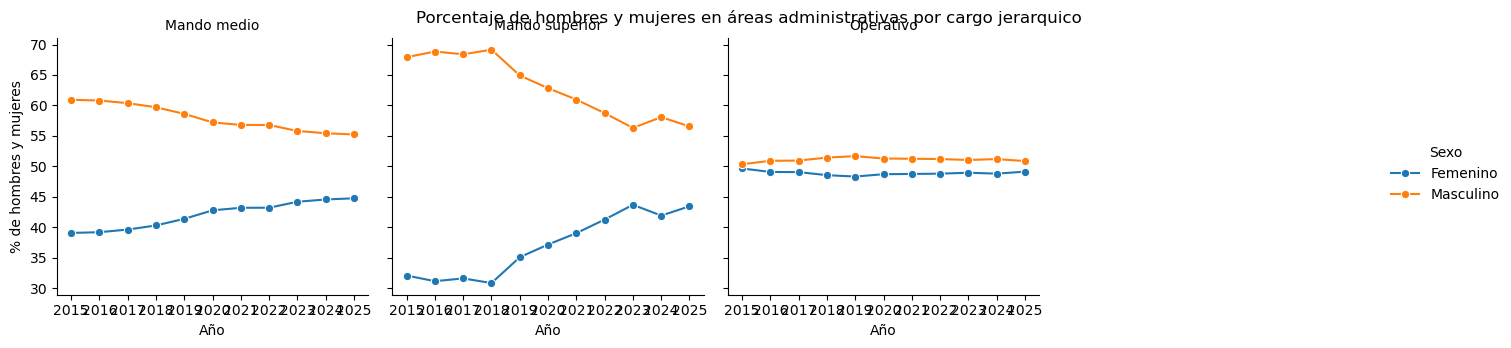

In [55]:
#grafica para las áreas administrativas por jerarquia 
df_plotaaj = Paa_jerar.reset_index().melt(
    id_vars=['año','desc_jerarquia'],
    value_vars=['Femenino','Masculino'],
    var_name='Sexo',
    value_name='Porcentaje'
)

g = sns.FacetGrid(
    df_plotaaj,
    col="desc_jerarquia",
    col_wrap=4,        # cuántos gráficos por fila
    height=3.5,
    sharey=True
)
g.map_dataframe(
    sns.lineplot,
    x="año",
    y="Porcentaje",
    hue="Sexo",
    marker="o"
)
g.add_legend(title="Sexo")
g.set_axis_labels("Año", "% de hombres y mujeres")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Porcentaje de hombres y mujeres en áreas administrativas por cargo jerarquico")
plt.show()

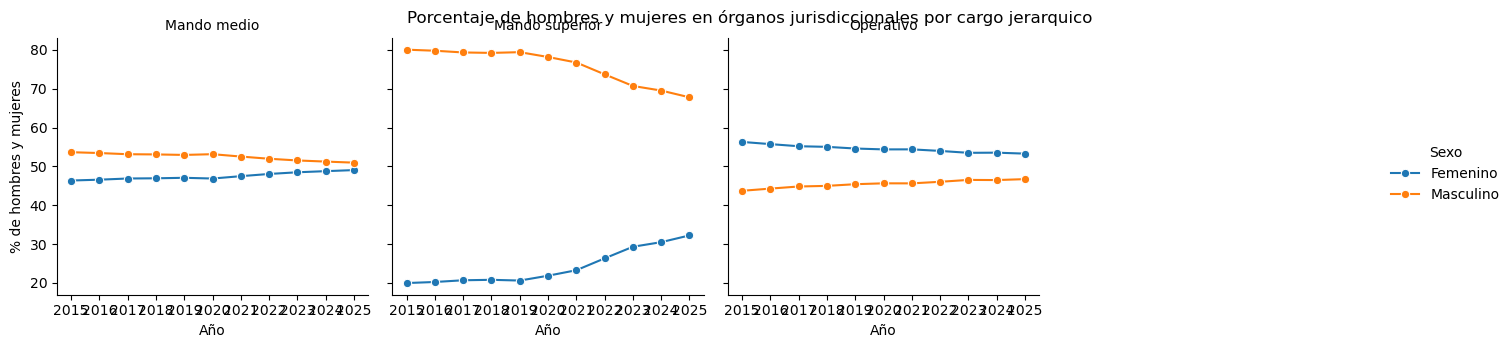

In [57]:
df_plotojj = Poj_jerar.reset_index().melt(
    id_vars=['año','desc_jerarquia'],
    value_vars=['Femenino','Masculino'],
    var_name='Sexo',
    value_name='Porcentaje'
)

g = sns.FacetGrid(
    df_plotojj,
    col="desc_jerarquia",
    col_wrap=4,        # cuántos gráficos por fila
    height=3.5,
    sharey=True
)
g.map_dataframe(
    sns.lineplot,
    x="año",
    y="Porcentaje",
    hue="Sexo",
    marker="o"
)
g.add_legend(title="Sexo")
g.set_axis_labels("Año", "% de hombres y mujeres")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Porcentaje de hombres y mujeres en órganos jurisdiccionales por cargo jerarquico")
plt.show()

In [59]:
#Porcentaje de mujeres y hombres en cargos titulares en el ámbito jurisdiccional y administrativo
#sería por grupo de puesto más que por cargos titulares, en el indicador por cargo jerárquico se observa 

Poj_puesto = pd.crosstab(
    index=[df_OJ['año'], df_OJ['desc_gpo_puesto']],    # índice con año y puesto
    columns=df_OJ['desc_genero'],      # columnas por grupo de género
    normalize='index'                 # normaliza por fila (año+sexo)
) * 100 
Poj_puesto

desc_genero                              Femenino  Masculino  No binario
año  desc_gpo_puesto                                                    
2015 Jueces                             20.911693  79.088307    0.000000
     Magistrados                        19.414400  80.585600    0.000000
     Personal administrativo            18.610909  81.389091    0.000000
     Personal jurisdiccional de apoyo   61.433809  38.566191    0.000000
     Secretarios de juzgado o tribunal  42.510080  57.489920    0.000000
2016 Jueces                             21.280161  78.719839    0.000000
     Magistrados                        19.567010  80.432990    0.000000
     Personal administrativo            21.810890  78.189110    0.000000
     Personal jurisdiccional de apoyo   60.916000  39.084000    0.000000
     Secretarios de juzgado o tribunal  42.894444  57.105556    0.000000
2017 Jueces                             22.404949  77.595051    0.000000
     Magistrados                        19.501908  80.498092    0.000000
     Personal administrativo            22.567249  77.432751    0.000000
     Personal jurisdiccional de apoyo   60.237921  39.762079    0.000000
     Secretarios de juzgado o tribunal  43.655443  56.344557    0.000000
2018 Jueces                             23.237901  76.762099    0.000000
     Magistrados                        19.097774  80.902226    0.000000
     Personal administrativo            23.253215  76.746785    0.000000
     Personal jurisdiccional de apoyo   59.761533  40.238467    0.000000
     Secretarios de juzgado o tribunal  43.811607  56.188393    0.000000
2019 Jueces                             23.326572  76.673428    0.000000
     Magistrados                        18.694303  81.305697    0.000000
     Personal administrativo            23.546235  76.453765    0.000000
     Personal jurisdiccional de apoyo   59.252913  40.747087    0.000000
     Secretarios de juzgado o tribunal  43.683191  56.316809    0.000000
2020 Jueces                             24.646210  75.353790    0.000000
     Magistrados                        19.769595  80.230405    0.000000
     Personal administrativo            24.350199  75.649801    0.000000
     Personal jurisdiccional de apoyo   58.901742  41.098258    0.000000
     Secretarios de juzgado o tribunal  43.398156  56.601844    0.000000
2021 Jueces                             26.518053  73.481947    0.000000
     Magistrados                        20.831647  79.168353    0.000000
     Personal administrativo            25.158879  74.841121    0.000000
     Personal jurisdiccional de apoyo   58.639103  41.360897    0.000000
     Secretarios de juzgado o tribunal  44.880503  55.119497    0.000000
2022 Jueces                             31.297616  68.702384    0.000000
     Magistrados                        22.354999  77.645001    0.000000
     Personal administrativo            25.691305  74.308695    0.000000
     Personal jurisdiccional de apoyo   58.234088  41.765912    0.000000
     Secretarios de juzgado o tribunal  45.876040  54.123960    0.000000
2023 Jueces                             35.636200  64.363800    0.000000
     Magistrados                        23.957544  76.042456    0.000000
     Personal administrativo            26.113793  73.884170    0.002037
     Personal jurisdiccional de apoyo   57.950460  42.046547    0.002993
     Secretarios de juzgado o tribunal  46.136646  53.863354    0.000000
2024 Jueces                             38.077223  61.922777    0.000000
     Magistrados                        23.799746  76.200254    0.000000
     Personal administrativo            27.677857  72.322143    0.000000
     Personal jurisdiccional de apoyo   57.783058  42.211294    0.005648
     Secretarios de juzgado o tribunal  46.312340  53.687660    0.000000
2025 Jueces                             39.656772  60.343228    0.000000
     Magistrados                        23.667377  76.332623    0.000000
     Personal administrativo            28.143275  71.8567

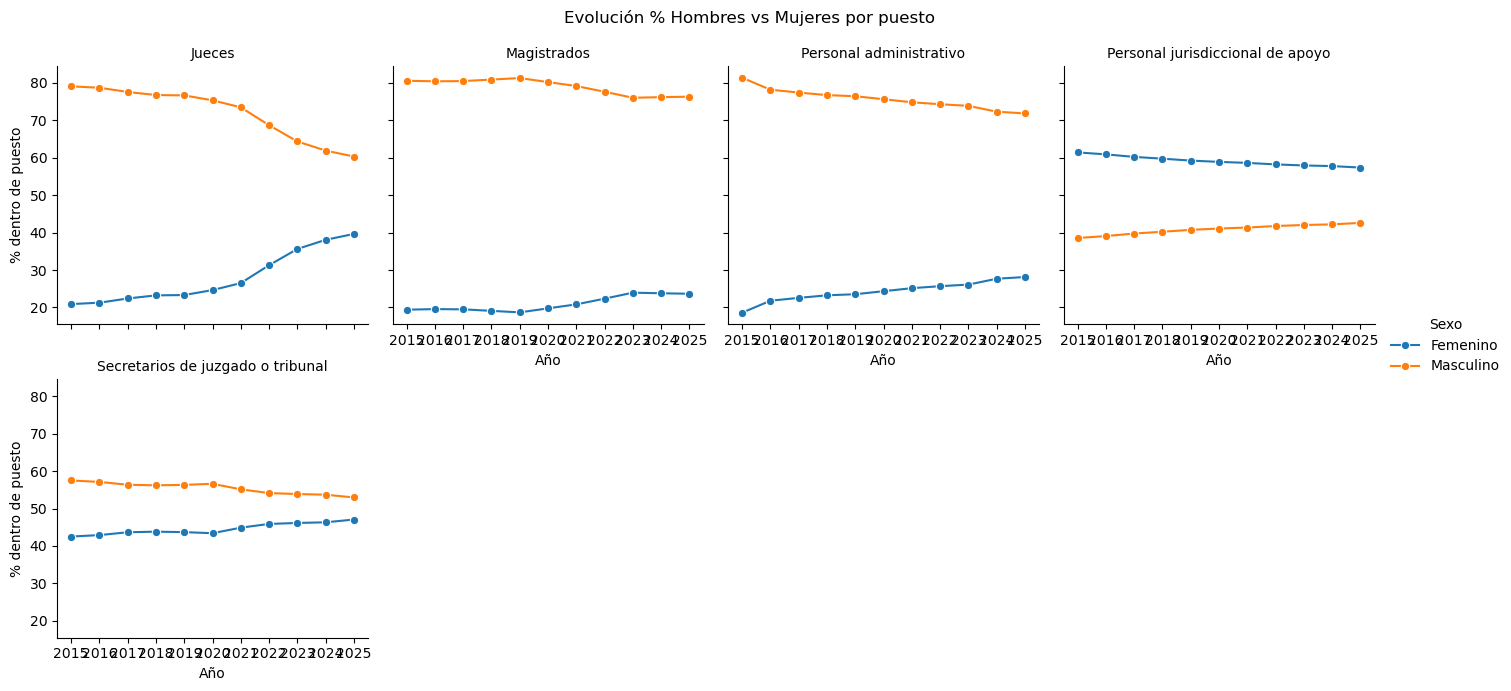

In [61]:
df_plotoj = Poj_puesto.reset_index().melt(
    id_vars=['año','desc_gpo_puesto'],
    value_vars=['Femenino','Masculino'],
    var_name='Sexo',
    value_name='Porcentaje'
)

g = sns.FacetGrid(
    df_plotoj,
    col="desc_gpo_puesto",
    col_wrap=4,        # cuántos gráficos por fila
    height=3.5,
    sharey=True
)
g.map_dataframe(
    sns.lineplot,
    x="año",
    y="Porcentaje",
    hue="Sexo",
    marker="o"
)
g.add_legend(title="Sexo")
g.set_axis_labels("Año", "% dentro de puesto")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Evolución % Hombres vs Mujeres por puesto")
plt.show()

In [63]:
Paa_puesto = pd.crosstab(
    index=[df_AA['año'], df_AA['desc_gpo_puesto']],    # índice con año y puesto
    columns=df_AA['desc_genero'],      # columnas por grupo de género
    normalize='index'                 # normaliza por fila (año+sexo)
) * 100 
Paa_puesto

desc_genero                              Femenino   Masculino
año  desc_gpo_puesto                                         
2015 Consejeros                         33.333333   66.666667
     Personal administrativo            44.792450   55.207550
     Secretarios de juzgado o tribunal  39.792388   60.207612
2016 Consejeros                         33.333333   66.666667
     Personal administrativo            44.700638   55.299362
     Secretarios de juzgado o tribunal  36.990596   63.009404
2017 Consejeros                         33.333333   66.666667
     Personal administrativo            44.873286   55.126714
     Secretarios de juzgado o tribunal  37.554585   62.445415
2018 Consejeros                         33.333333   66.666667
     Personal administrativo            44.799101   55.200899
     Secretarios de juzgado o tribunal  47.783251   52.216749
2019 Consejeros                         35.714286   64.285714
     Personal administrativo            45.233696   54.766304
     Secretarios de juzgado o tribunal  47.524752   52.475248
2020 Consejeros                         33.333333   66.666667
     Personal administrativo            46.035134   53.964866
     Secretarios de juzgado o tribunal  44.588745   55.411255
2021 Consejeros                         33.802817   66.197183
     Personal administrativo            46.296518   53.703482
     Secretarios de juzgado o tribunal  42.146597   57.853403
2022 Consejeros                         34.545455   65.454545
     Jueces                              0.000000  100.000000
     Magistrados                        25.000000   75.000000
     Personal administrativo            46.379037   53.620963
     Secretarios de juzgado o tribunal  38.422819   61.577181
2023 Consejeros                         41.935484   58.064516
     Magistrados                         0.000000  100.000000
     Personal administrativo            46.979816   53.020184
     Secretarios de juzgado o tribunal  44.020101   55.979899
2024 Consejeros                         52.941176   47.058824
     Personal administrativo            46.966607   53.033393
     Secretarios de juzgado o tribunal  44.829245   55.170755
2025 Consejeros                         50.000000   50.000000
     Personal administrativo            47.245053   52.754947
     Secretarios de juzgado o tribunal  45.528455   54.471545

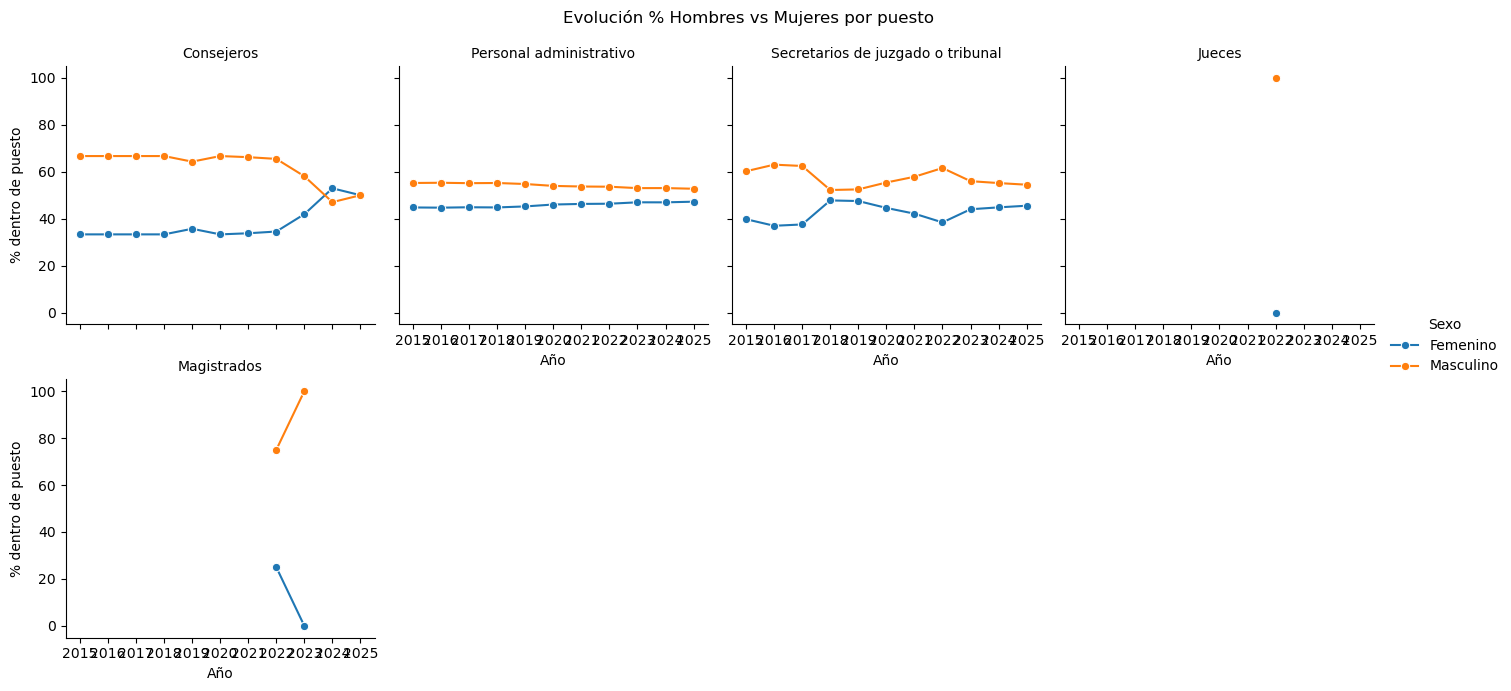

In [65]:
df_plot = Paa_puesto.reset_index().melt(
    id_vars=['año','desc_gpo_puesto'],
    value_vars=['Femenino','Masculino'],
    var_name='Sexo',
    value_name='Porcentaje'
)

g = sns.FacetGrid(
    df_plot,
    col="desc_gpo_puesto",
    col_wrap=4,        # cuántos gráficos por fila
    height=3.5,
    sharey=True
)
g.map_dataframe(
    sns.lineplot,
    x="año",
    y="Porcentaje",
    hue="Sexo",
    marker="o"
)
g.add_legend(title="Sexo")
g.set_axis_labels("Año", "% dentro de puesto")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Evolución % Hombres vs Mujeres por puesto")
plt.show()

In [67]:
#eliminaron algunas categorias que no son estadisticamente representativas para los años recientes, esto se hizo posterior de graficar.
df_AAfil = df_AA[~df_AA['desc_tp_unidad'].isin(['No aplica', 'CMPC', 'Unidad de enlace', 'Comité', 'Archivo general' , 'Centro de manejo documental y digitalización' , 'DGSM local', 'Secretaria técnica' ])]

In [69]:
df_AAfil['desc_tp_unidad'].value_counts()

desc_tp_unidad
Dirección general                   156780
Administración (CAR)                 89670
OCC                                  73787
Administración (DGSG)                54577
Coordinación                         53280
Plazas a disposición                 43091
Secretaria ejecutiva                 35651
Unidad de área                       26212
DGSP local                           24551
Ponencia                             19521
DGTI local                           13386
Delegación administrativa (CAR)      12851
Unidad de notificadores              11973
Secretaría general                    1895
Comisión                              1471
Área común juzgados                    380
Sindicato de trabajadores de PJF       123
Name: count, dtype: int64

In [71]:
#No creo que sea viable por tipo de unidad pero coloco y es solo para áreas administrativas

Paa_unidad = pd.crosstab(
    index=[df_AAfil['año'], df_AAfil['desc_tp_unidad']],    # índice con año y sexo
    columns=df_AAfil['desc_genero'],      # columnas con rango de jerarquico
    normalize='index'                 # normaliza por fila (año+sexo)
) * 100 
Paa_unidad

desc_genero                             Femenino   Masculino
año  desc_tp_unidad                                         
2015 Administración (CAR)              44.869638   55.130362
     Administración (DGSG)             30.089118   69.910882
     Comisión                          32.710280   67.289720
     Coordinación                      30.325742   69.674258
     DGSP local                        81.501832   18.498168
...                                          ...         ...
2025 Secretaría general                43.689320   56.310680
     Sindicato de trabajadores de PJF   0.000000  100.000000
     Unidad de notificadores           26.739927   73.260073
     Unidad de área                    47.432024   52.567976
     Área común juzgados                0.000000  100.000000

[183 rows x 2 columns]

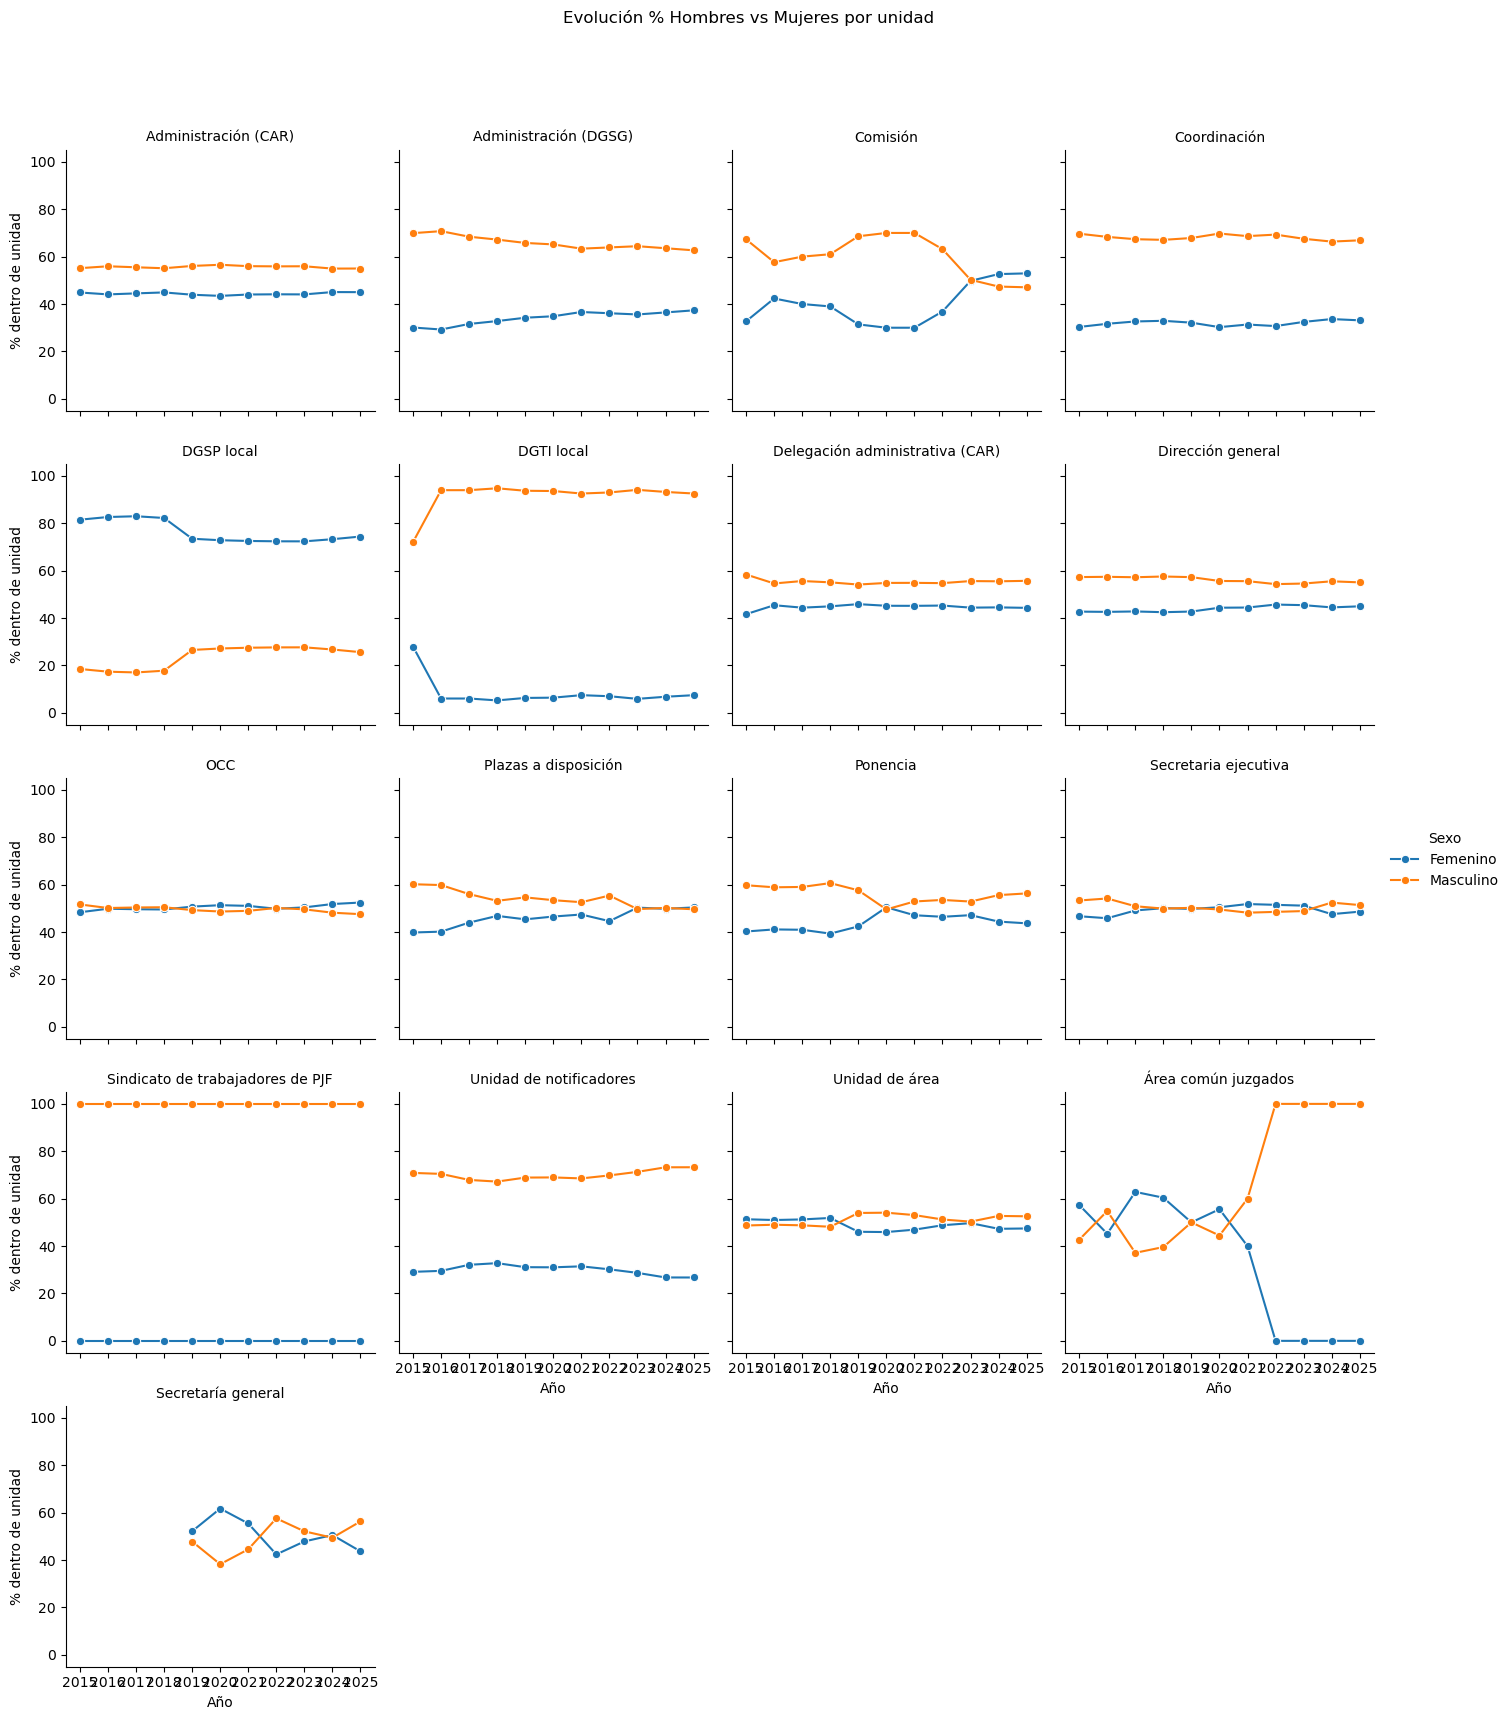

In [73]:
df_plot = Paa_unidad.reset_index().melt(
    id_vars=['año','desc_tp_unidad'],
    value_vars=['Femenino','Masculino'],
    var_name='Sexo',
    value_name='Porcentaje'
)

g = sns.FacetGrid(
    df_plot,
    col="desc_tp_unidad",
    col_wrap=4,        # cuántos gráficos por fila
    height=3.5,
    sharey=True
)
g.map_dataframe(
    sns.lineplot,
    x="año",
    y="Porcentaje",
    hue="Sexo",
    marker="o"
)
g.add_legend(title="Sexo")
g.set_axis_labels("Año", "% dentro de unidad")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Evolución % Hombres vs Mujeres por unidad")
plt.show()

# Indicadores de Ambientes laborales libres de discriminaciones y violencias #
* Distribución porcentual de los distintos ingresos salariales por sexo 

In [75]:
#órganos jurisdiccionales
resumen_salario = (
    df_OJ
    .groupby([ 'desc_gpo_puesto'])['dia_bruto']
    .agg(
        media='mean',
        mediana='median',
        std='std',
        minimo='min',
        maximo='max',
        n='count'
    )
    .round(2)
    .reset_index()
)

resumen_salario

,desc_gpo_puesto,media,mediana,std,minimo,maximo,n
0,Jueces,6258.70,6198.62,238.86,2609.52,6862.75,73874
1,Magistrados,6914.64,6849.69,225.22,5147.11,9972.84,101416
2,Personal administrativo,822.81,787.88,263.54,434.22,5063.70,453537
3,Personal jurisdiccional de apoyo,1114.34,1010.62,389.60,444.70,5438.02,2595173
4,Secretarios de juzgado o tribunal,3177.36,3154.23,239.64,820.31,6884.14,870148


In [ ]:
#Crearon parametros salariales: 
#Jueces   2609.52 -6198.62	- 6862.75	
# Magistrados 5147.11   6849.69 9972.84
# Personal administrativo  434.22  787.88  5063.70
# Personal jurisdiccional de apoyo  444.70  1010.62 5438.02	
# Secretario de juzgado o tribunal 820.31	 3154.23  6884.14

In [77]:
# Agrupar por puesto y calcular estadísticos

# Crear cuartiles dentro de cada puesto
#df_OJ['cuartil_puesto'] = df_OJ.groupby('desc_gpo_puesto', group_keys=False)['dia_bruto'].apply(
#    lambda x: pd.qcut(x, q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
#)
rango_puestos_oj = df_OJ.groupby('desc_gpo_puesto')['dia_bruto'].agg(['min', 'median', 'max']).reset_index()
rango_puestos_oj

,desc_gpo_puesto,min,median,max
0,Jueces,2609.52,6198.62,6862.75
1,Magistrados,5147.11,6849.69,9972.84
2,Personal administrativo,434.22,787.88,5063.70
3,Personal jurisdiccional de apoyo,444.70,1010.62,5438.02
4,Secretarios de juzgado o tribunal,820.31,3154.23,6884.14


In [79]:
#Merge
df_OJ = df_OJ.merge(rango_puestos_oj, on='desc_gpo_puesto', how='left')

In [81]:
df_OJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4094148 entries, 0 to 4094147
Data columns (total 38 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   periodo                 int64  
 1   nom_adscripcion         object 
 2   cve_tp_adscripcion      object 
 3   desc_tp_adscripcion     object 
 4   cve_circuito            int64  
 5   desc_circuito           object 
 6   cve_jurisdiccion        object 
 7   desc_jurisdiccion       object 
 8   desc_centro_aux_region  object 
 9   desc_entidad            object 
 10  desc_localidad          object 
 11  latitud                 float64
 12  longitud                float64
 13  domicilio               object 
 14  desc_tp_organo_largo    object 
 15  desc_especialidad       object 
 16  desc_tp_contrato        object 
 17  tpo_nomb                object 
 18  desc_jerarquia          object 
 19  nom_puesto              object 
 20  cve_gpo_puesto          int64  
 21  desc_gpo_puesto         object 

In [83]:
df_OJ.head()

,periodo,nom_adscripcion,cve_tp_adscripcion,desc_tp_adscripcion,cve_circuito,desc_circuito,cve_jurisdiccion,desc_jurisdiccion,desc_centro_aux_region,desc_entidad,...,dias,salario_bruto,salario_neto,año,mes,dia_bruto,dia_neto,min,median,max
0,201501,10MO TRIBUNAL COLEGIADO EN MATERIA ADMINISTRAT...,OJ,Órganos jurisdiccionales,1,1° Circuito,01_01,1° Circuito: Jurisdicción 1,No aplica,Distrito Federal,...,31,205138.75,141820.81,2015,01,6617.38,4574.86,5147.11,6849.69,9972.84
1,201501,10MO TRIBUNAL COLEGIADO EN MATERIA ADMINISTRAT...,OJ,Órganos jurisdiccionales,1,1° Circuito,01_01,1° Circuito: Jurisdicción 1,No aplica,Distrito Federal,...,31,205138.75,141820.81,2015,01,6617.38,4574.86,5147.11,6849.69,9972.84
2,201501,10MO TRIBUNAL COLEGIADO EN MATERIA ADMINISTRAT...,OJ,Órganos jurisdiccionales,1,1° Circuito,01_01,1° Circuito: Jurisdicción 1,No aplica,Distrito Federal,...,31,205138.75,141820.81,2015,01,6617.38,4574.86,5147.11,6849.69,9972.84
3,201501,10MO TRIBUNAL COLEGIADO EN MATERIA ADMINISTRAT...,OJ,Órganos jurisdiccionales,1,1° Circuito,01_01,1° Circuito: Jurisdicción 1,No aplica,Distrito Federal,...,31,50850.10,37548.15,2015,01,1640.33,1211.23,444.70,1010.62,5438.02
4,201501,10MO TRIBUNAL COLEGIADO EN MATERIA ADMINISTRAT...,OJ,Órganos jurisdiccionales,1,1° Circuito,01_01,1° Circuito: Jurisdicción 1,No aplica,Distrito Federal,...,31,50850.10,37548.15,2015,01,1640.33,1211.23,444.70,1010.62,5438.02


In [85]:
print(df_OJ[['dia_bruto', 'median']].isnull().sum())

dia_bruto    0
median       0
dtype: int64


In [89]:
#asignar las etiquetas
def asignar_rango(row):
    if row['dia_bruto'] < row['median']:
        return 'Debajo de la mediana'
    elif row['dia_bruto'] == row['median']:
        return 'En la mediana'
    elif row['dia_bruto'] >= row['median']:
        return 'Arriba de la mediana'
    else:
        return 'No está en el rango'

In [91]:
#ajustar
df_OJ['rango'] = df_OJ.apply(asignar_rango, axis=1)

In [93]:
df_OJ.head(3)

,periodo,nom_adscripcion,cve_tp_adscripcion,desc_tp_adscripcion,cve_circuito,desc_circuito,cve_jurisdiccion,desc_jurisdiccion,desc_centro_aux_region,desc_entidad,...,salario_bruto,salario_neto,año,mes,dia_bruto,dia_neto,min,median,max,rango
0,201501,10MO TRIBUNAL COLEGIADO EN MATERIA ADMINISTRAT...,OJ,Órganos jurisdiccionales,1,1° Circuito,01_01,1° Circuito: Jurisdicción 1,No aplica,Distrito Federal,...,205138.75,141820.81,2015,01,6617.38,4574.86,5147.11,6849.69,9972.84,Debajo de la mediana
1,201501,10MO TRIBUNAL COLEGIADO EN MATERIA ADMINISTRAT...,OJ,Órganos jurisdiccionales,1,1° Circuito,01_01,1° Circuito: Jurisdicción 1,No aplica,Distrito Federal,...,205138.75,141820.81,2015,01,6617.38,4574.86,5147.11,6849.69,9972.84,Debajo de la mediana
2,201501,10MO TRIBUNAL COLEGIADO EN MATERIA ADMINISTRAT...,OJ,Órganos jurisdiccionales,1,1° Circuito,01_01,1° Circuito: Jurisdicción 1,No aplica,Distrito Federal,...,205138.75,141820.81,2015,01,6617.38,4574.86,5147.11,6849.69,9972.84,Debajo de la mediana


In [95]:

tablaojs = pd.crosstab(
    index=[df_OJ['año'], df_OJ['desc_gpo_puesto'], df_OJ['rango']],
    columns=df_OJ['desc_genero'],
    normalize='index'
) * 100
tablaojs

desc_genero                                                   Femenino  \
año  desc_gpo_puesto                   rango                             
2015 Jueces                            Arriba de la mediana  20.716113   
                                       Debajo de la mediana  20.928683   
     Magistrados                       Arriba de la mediana  19.422572   
                                       Debajo de la mediana  19.413657   
     Personal administrativo           Arriba de la mediana  46.517136   
...                                                                ...   
2025 Personal administrativo           Debajo de la mediana  23.155476   
     Personal jurisdiccional de apoyo  Arriba de la mediana  57.389133   
                                       Debajo de la mediana  56.129032   
     Secretarios de juzgado o tribunal Arriba de la mediana  47.164547   
                                       Debajo de la mediana  46.811633   

desc_genero                                                  Masculino  \
año  desc_gpo_puesto                   rango                             
2015 Jueces                            Arriba de la mediana  79.283887   
                                       Debajo de la mediana  79.071317   
     Magistrados                       Arriba de la mediana  80.577428   
                                       Debajo de la mediana  80.586343   
     Personal administrativo           Arriba de la mediana  53.482864   
...                                                                ...   
2025 Personal administrativo           Debajo de la mediana  76.844524   
     Personal jurisdiccional de apoyo  Arriba de la mediana  42.598978   
                                       Debajo de la mediana  43.870968   
     Secretarios de juzgado o tribunal Arriba de la mediana  52.835453   
                                       Debajo de la mediana  53.188367   

desc_genero                                                  No binario  
año  desc_gpo_puesto                   rango                             
2015 Jueces                            Arriba de la mediana    0.000000  
                                       Debajo de la mediana    0.000000  
     Magistrados                       Arriba de la mediana    0.000000  
                                       Debajo de la mediana    0.000000  
     Personal administrativo           Arriba de la mediana    0.000000  
...                                                                 ...  
2025 Personal administrativo           Debajo de la mediana    0.000000  
     Personal jurisdiccional de apoyo  Arriba de la mediana    0.011889  
                                       Debajo de la mediana    0.000000  
     Secretarios de juzgado o tribunal Arriba de la mediana    0.000000  
                                       Debajo de la mediana    0.000000  

[135 rows x 3 columns]

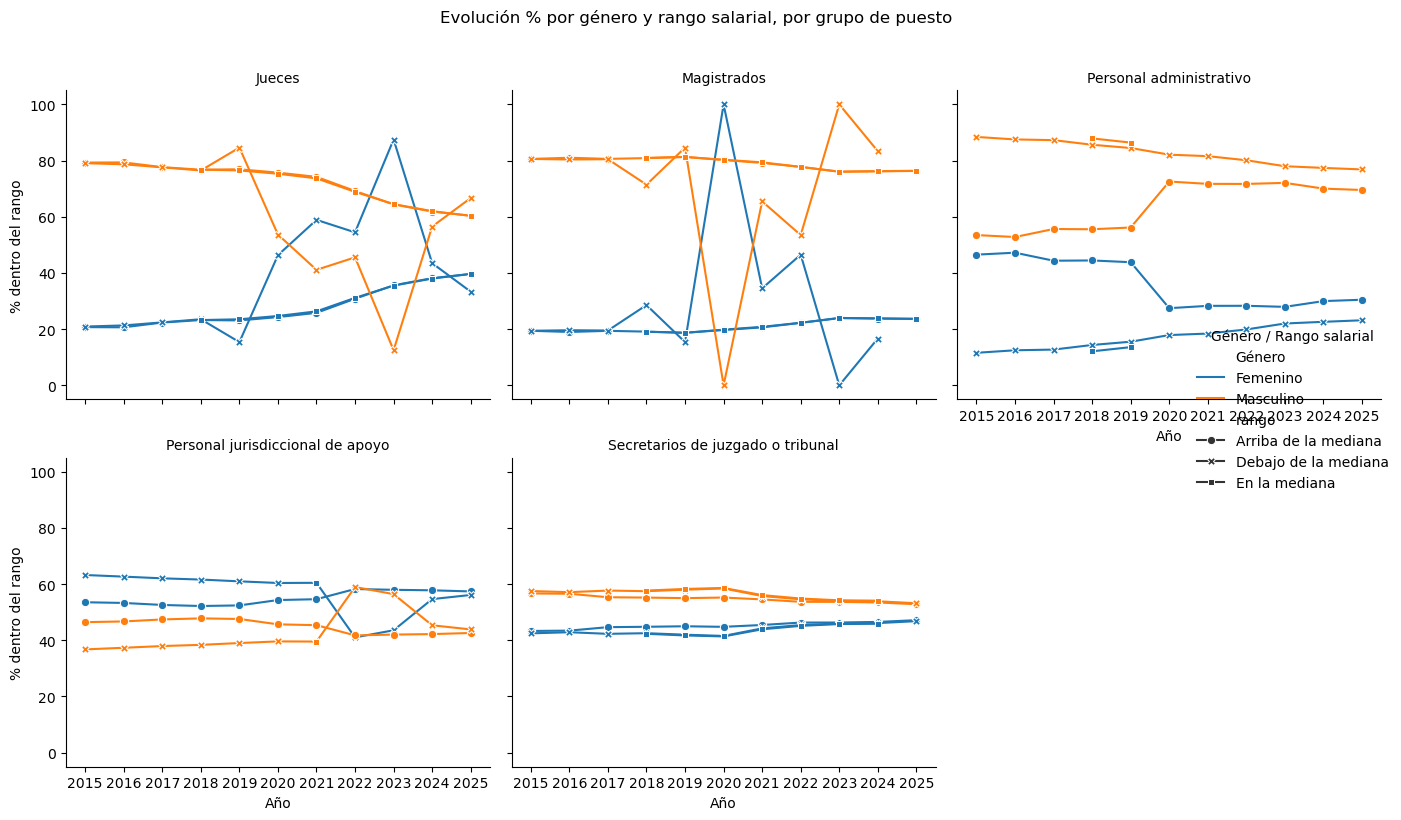

In [97]:
# 1. Convertimos la tabla en formato largo para graficar
df_plot = tablaojs.reset_index().melt(
    id_vars=['año', 'desc_gpo_puesto', 'rango'],
    value_vars=['Femenino','Masculino'],# Variables clave
    var_name='Género',
    value_name='Porcentaje'
)

# 2. Creamos el gráfico con seaborn FacetGrid
g = sns.FacetGrid(
    df_plot,
    col='desc_gpo_puesto',     # Un gráfico por grupo de puesto
    col_wrap=3,                # Número de gráficos por fila
    height=4,
    sharey=True
)

# 3. Agregamos las líneas por año, diferenciando por género y estilo de línea por rango
g.map_dataframe(
    sns.lineplot,
    x='año',
    y='Porcentaje',
    hue='Género',
    style='rango',
    markers=True,
    dashes=False
)

# 4. Ajustes finales
g.add_legend(title='Género / Rango salarial')
g.set_axis_labels("Año", "% dentro del rango")
g.set_titles("{col_name}")
g.fig.suptitle("Evolución % por género y rango salarial, por grupo de puesto", y=1.02)
plt.tight_layout()
plt.show()

In [169]:
df_OJ.to_csv("/Users/karlacruz/Desktop/MIDI/organos_jurisdiccionales15_25.csv", index=False)

OSError: [Errno 28] No space left on device: '/Users/karlacruz/Desktop/MIDI/organos_jurisdiccionales15_25.csv'

# Áreas administrativas #

In [101]:
#áreas administrativas
resumen_salarioaa = (
    df_AA
    .groupby([ 'desc_gpo_puesto'])['dia_bruto']
    .agg(
        media='mean',
        mediana='median',
        std='std',
        minimo='min',
        maximo='max',
        n='count'
    )
    .round(2)
    .reset_index()
)

resumen_salarioaa

,desc_gpo_puesto,media,mediana,std,minimo,maximo,n
0,Consejeros,10601.19,9792.76,1460.73,8073.42,13989.65,704
1,Jueces,6405.24,6405.24,NaN,6405.24,6405.24,1
2,Magistrados,6980.16,7078.01,122.04,6849.69,7078.01,7
3,Personal administrativo,1428.35,1066.53,927.54,434.22,7775.09,983041
4,Secretarios de juzgado o tribunal,3227.02,3331.04,238.48,1180.09,3687.93,7322


In [103]:
rango_puestos_aa = df_AA.groupby('desc_gpo_puesto')['dia_bruto'].agg(['min', 'median', 'max']).reset_index()
rango_puestos_aa

,desc_gpo_puesto,min,median,max
0,Consejeros,8073.42,9792.76,13989.65
1,Jueces,6405.24,6405.24,6405.24
2,Magistrados,6849.69,7078.01,7078.01
3,Personal administrativo,434.22,1066.53,7775.09
4,Secretarios de juzgado o tribunal,1180.09,3331.04,3687.93


In [105]:
df_AA = df_AA.merge(rango_puestos_aa, on='desc_gpo_puesto', how='left')

In [107]:
#ajustar
df_AA['rango'] = df_AA.apply(asignar_rango, axis=1)

In [109]:
df_AA.head(3)

,periodo,nom_adscripcion,cve_tp_adscripcion,desc_tp_adscripcion,desc_entidad,desc_localidad,desc_tp_contrato,tpo_nomb,desc_jerarquia,nom_puesto,...,salario_bruto,salario_neto,año,mes,dia_bruto,dia_neto,min,median,max,rango
0,201501,Área administrativa,AA,Áreas administrativas,Aguascalientes,Aguascalientes,Permanente,Base,Operativo,OFICIAL ADMINISTRATIVO,...,23524.26,17800.96,2015,01,758.85,574.22,434.22,1066.53,7775.09,Debajo de la mediana
1,201501,Área administrativa,AA,Áreas administrativas,Aguascalientes,Aguascalientes,Permanente,Base,Operativo,OFICIAL ADMINISTRATIVO,...,23524.26,17800.96,2015,01,758.85,574.22,434.22,1066.53,7775.09,Debajo de la mediana
2,201501,Área administrativa,AA,Áreas administrativas,Aguascalientes,Aguascalientes,Permanente,Base,Operativo,OFICIAL ADMINISTRATIVO,...,23524.26,17800.96,2015,01,758.85,574.22,434.22,1066.53,7775.09,Debajo de la mediana


In [111]:

tablaAA = pd.crosstab(
    index=[df_AA['año'], df_AA['desc_gpo_puesto'], df_AA['rango']],
    columns=df_OJ['desc_genero'],
    normalize='index'
) * 100
tablaAA

desc_genero                                                   Femenino  \
año  desc_gpo_puesto                   rango                             
2015 Consejeros                        Arriba de la mediana  48.611111   
     Personal administrativo           Arriba de la mediana  51.301046   
                                       Debajo de la mediana  51.661026   
     Secretarios de juzgado o tribunal Debajo de la mediana  48.442907   
2016 Consejeros                        Arriba de la mediana  63.888889   
...                                                                ...   
2025 Personal administrativo           Arriba de la mediana  50.642896   
                                       Debajo de la mediana  50.781969   
     Secretarios de juzgado o tribunal Arriba de la mediana  45.161290   
                                       Debajo de la mediana  51.485149   
                                       En la mediana         53.472222   

desc_genero                                                  Masculino  
año  desc_gpo_puesto                   rango                            
2015 Consejeros                        Arriba de la mediana  51.388889  
     Personal administrativo           Arriba de la mediana  48.698954  
                                       Debajo de la mediana  48.338974  
     Secretarios de juzgado o tribunal Debajo de la mediana  51.557093  
2016 Consejeros                        Arriba de la mediana  36.111111  
...                                                                ...  
2025 Personal administrativo           Arriba de la mediana  49.357104  
                                       Debajo de la mediana  49.218031  
     Secretarios de juzgado o tribunal Arriba de la mediana  54.838710  
                                       Debajo de la mediana  48.514851  
                                       En la mediana         46.527778  

[81 rows x 2 columns]

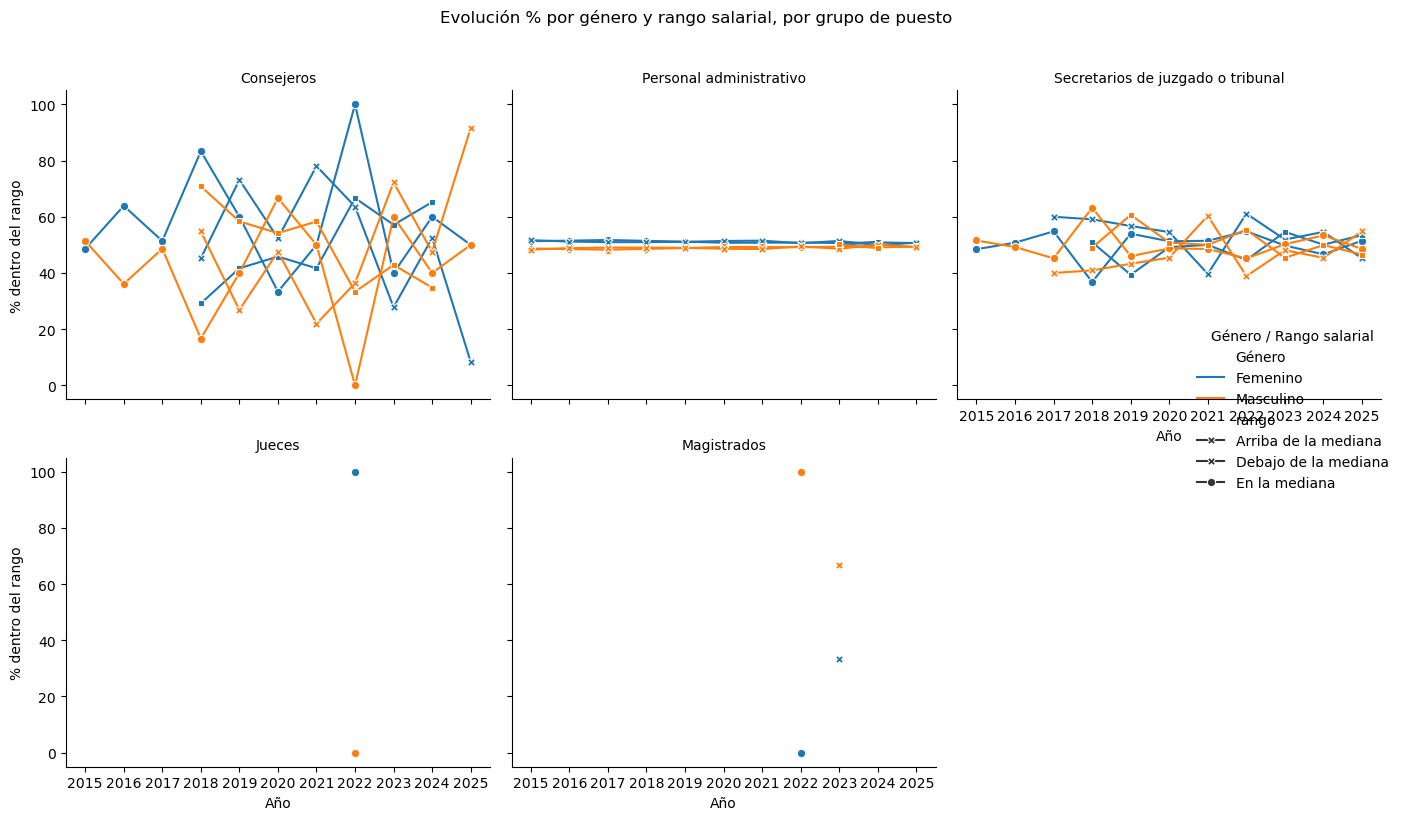

In [113]:
# 1. Convertimos la tabla en formato largo para graficar
df_plotaa = tablaAA.reset_index().melt(
    id_vars=['año', 'desc_gpo_puesto', 'rango'],  # Variables clave
    var_name='Género',
    value_name='Porcentaje'
)

# 2. Creamos el gráfico con seaborn FacetGrid
g = sns.FacetGrid(
    df_plotaa,
    col='desc_gpo_puesto',     # Un gráfico por grupo de puesto
    col_wrap=3,                # Número de gráficos por fila
    height=4,
    sharey=True
)

# 3. Agregamos las líneas por año, diferenciando por género y estilo de línea por rango
g.map_dataframe(
    sns.lineplot,
    x='año',
    y='Porcentaje',
    hue='Género',
    style='rango',
    markers=True,
    dashes=False
)

# 4. Ajustes finales
g.add_legend(title='Género / Rango salarial')
g.set_axis_labels("Año", "% dentro del rango")
g.set_titles("{col_name}")
g.fig.suptitle("Evolución % por género y rango salarial, por grupo de puesto", y=1.02)
plt.tight_layout()
plt.show()

In [161]:
df_AA.to_csv("/Users/karlacruz/Desktop/MIDI/BD/areas_adm15_25.csv", index=False)

# Indicador de Gap salary #

In [115]:
#tabla de la serie OJ
#tipo de área, unidad, y organo aux no aplica para organos jurisdiccionales
colapse_OJ = df_OJ.groupby([ 'año', 'desc_circuito' , 'desc_jurisdiccion', 'desc_entidad', 'desc_localidad', 'tpo_nomb' , 'desc_tp_contrato' , 'desc_genero','desc_jerarquia'])['dia_bruto'].mean().reset_index()
print(colapse_OJ)

        año desc_circuito             desc_jurisdiccion desc_entidad  \
0      2015  10° Circuito  10° Circuito: Jurisdicción 1      Tabasco   
1      2015  10° Circuito  10° Circuito: Jurisdicción 1      Tabasco   
2      2015  10° Circuito  10° Circuito: Jurisdicción 1      Tabasco   
3      2015  10° Circuito  10° Circuito: Jurisdicción 1      Tabasco   
4      2015  10° Circuito  10° Circuito: Jurisdicción 1      Tabasco   
...     ...           ...                           ...          ...   
25961  2025     No aplica                     No aplica    Zacatecas   
25962  2025     No aplica                     No aplica    Zacatecas   
25963  2025     No aplica                     No aplica    Zacatecas   
25964  2025     No aplica                     No aplica    Zacatecas   
25965  2025     No aplica                     No aplica    Zacatecas   

      desc_localidad   tpo_nomb desc_tp_contrato desc_genero  desc_jerarquia  \
0       Villahermosa       Base       Permanente    Fem

In [117]:
#tabla de la serie AA
colapse_AA = df_AA.groupby([ 'año', 'desc_entidad', 'desc_localidad', 'tpo_nomb' , 'desc_tp_contrato' , 'desc_genero','desc_jerarquia'])['dia_bruto'].mean().reset_index()
print(colapse_AA)

        año    desc_entidad  desc_localidad   tpo_nomb desc_tp_contrato  \
0      2015  Aguascalientes  Aguascalientes       Base       Permanente   
1      2015  Aguascalientes  Aguascalientes       Base       Permanente   
2      2015  Aguascalientes  Aguascalientes  Confianza         Eventual   
3      2015  Aguascalientes  Aguascalientes  Confianza         Eventual   
4      2015  Aguascalientes  Aguascalientes  Confianza         Eventual   
...     ...             ...             ...        ...              ...   
10147  2025       Zacatecas       Zacatecas  Confianza       Permanente   
10148  2025       Zacatecas       Zacatecas  Confianza       Permanente   
10149  2025       Zacatecas       Zacatecas  Confianza       Permanente   
10150  2025       Zacatecas       Zacatecas   Interino         Eventual   
10151  2025       Zacatecas       Zacatecas   Interino         Eventual   

      desc_genero desc_jerarquia    dia_bruto  
0        Femenino      Operativo   774.055000  
1  

In [119]:
#Borrar no binario
ncolapse_OJ = colapse_OJ[colapse_OJ['desc_genero'] != 'No binario']

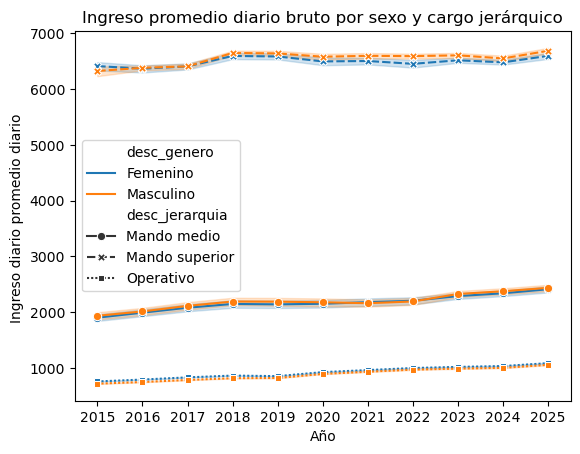

In [121]:
#scatter plot
sns.lineplot(data=ncolapse_OJ, x='año', y='dia_bruto', hue='desc_genero', style='desc_jerarquia', markers=True)
plt.title("Ingreso promedio diario bruto por sexo y cargo jerárquico")
plt.ylabel("Ingreso diario promedio diario ")
plt.xlabel("Año")
plt.show()

In [125]:
#Calcular el gap
brecha_oj = ncolapse_OJ.pivot_table(
    index=['año', 'desc_entidad', 'desc_localidad', 'tpo_nomb' , 'desc_tp_contrato' , 'desc_jerarquia'],
    columns='desc_genero',
    values='dia_bruto'
).reset_index()

In [127]:
#Calcular el gap
brecha_AA = colapse_AA.pivot_table(
    index=['año', 'desc_entidad', 'desc_localidad', 'tpo_nomb' , 'desc_tp_contrato' , 'desc_jerarquia'],
    columns='desc_genero',
    values='dia_bruto'
).reset_index()

In [129]:
brecha_oj.head()

desc_genero,año,desc_entidad,desc_localidad,tpo_nomb,desc_tp_contrato,desc_jerarquia,Femenino,Masculino
0,2015,Aguascalientes,Aguascalientes,Base,Permanente,Mando medio,2766.360427,2455.541390
1,2015,Aguascalientes,Aguascalientes,Base,Permanente,Mando superior,6749.990000,6522.148318
2,2015,Aguascalientes,Aguascalientes,Base,Permanente,Operativo,778.566950,695.243708
3,2015,Aguascalientes,Aguascalientes,Confianza,Eventual,Mando medio,1263.543559,1237.332222
4,2015,Aguascalientes,Aguascalientes,Confianza,Eventual,Operativo,681.386667,689.232308


In [131]:
brecha_oj.isnull().sum()  # Total de nulos por columna (no hay 85 casos porque no existe información para comparar) me falta quitar 

desc_genero
año                   0
desc_entidad          0
desc_localidad        0
tpo_nomb              0
desc_tp_contrato      0
desc_jerarquia        0
Femenino            950
Masculino           418
dtype: int64

In [133]:
#Se eliminan los nulos, no hay puesto para comparar la brecha
brecha_oj = brecha_oj.dropna()

In [135]:
#Se comprueba que se eliminan los nulos.
brecha_oj.isnull().sum()

desc_genero
año                 0
desc_entidad        0
desc_localidad      0
tpo_nomb            0
desc_tp_contrato    0
desc_jerarquia      0
Femenino            0
Masculino           0
dtype: int64

In [137]:
#Se comprueba que se eliminan los nulos.
brecha_AA.isnull().sum()

desc_genero
año                    0
desc_entidad           0
desc_localidad         0
tpo_nomb               0
desc_tp_contrato       0
desc_jerarquia         0
Femenino            1164
Masculino            902
dtype: int64

In [139]:
#Se eliminan los nulos, no hay puesto para comparar la brecha
brecha_AA = brecha_AA.dropna()

In [141]:
#Se comprueba que se eliminan los nulos.
brecha_AA.isnull().sum()

desc_genero
año                 0
desc_entidad        0
desc_localidad      0
tpo_nomb            0
desc_tp_contrato    0
desc_jerarquia      0
Femenino            0
Masculino           0
dtype: int64

In [143]:
# Diferencia absoluta (hombres - mujeres)
brecha_oj['brecha_absoluta'] = brecha_oj['Masculino'] - brecha_oj['Femenino']

# Diferencia relativa (% menos que hombres)
brecha_oj['brecha_relativa_%'] = (brecha_oj['brecha_absoluta'] / brecha_oj['Masculino']) * 100


In [149]:
brecha_oj.describe()

desc_genero,Femenino,Masculino,brecha_absoluta,brecha_relativa_%
count,7621.000000,7621.000000,7621.000000,7621.000000
mean,2082.356788,2077.041230,-5.315558,-1.892322
std,1687.520372,1710.121747,222.376793,11.287952
min,476.925000,495.720000,-2254.180000,-205.055012
25%,943.862353,929.412206,-67.546588,-5.699733
50%,1331.864411,1313.526648,-14.525967,-1.119748
75%,2770.120476,2786.966322,36.044961,2.012473
max,7216.635000,7216.635000,2260.486111,66.334571


In [145]:
# Diferencia absoluta (hombres - mujeres)
brecha_AA['brecha_absoluta'] = brecha_AA['Masculino'] - brecha_AA['Femenino']

# Diferencia relativa (% menos que hombres)
brecha_AA['brecha_relativa_%'] = (brecha_AA['brecha_absoluta'] / brecha_AA['Masculino']) * 100

In [151]:
brecha_AA.describe()

desc_genero,Femenino,Masculino,brecha_absoluta,brecha_relativa_%
count,4043.000000,4043.000000,4043.000000,4043.000000
mean,1429.653224,1454.462561,24.809337,-2.202733
std,837.063785,883.522863,309.302184,20.070633
min,440.012000,441.460000,-2092.484667,-163.652655
25%,875.315455,841.431667,-87.539981,-8.588720
50%,1053.102759,1027.076067,-0.111237,-0.012674
75%,1929.106947,2154.857306,76.727323,5.824537
max,7163.392500,7078.010000,1648.092917,60.827825


In [157]:

brecha_AA.to_csv("/Users/karlacruz/Desktop/MIDI/BD/brechaAA.csv", index=False)

In [159]:
brecha_oj.to_csv("/Users/karlacruz/Desktop/MIDI/BD/brechaOJ.csv", index=False)

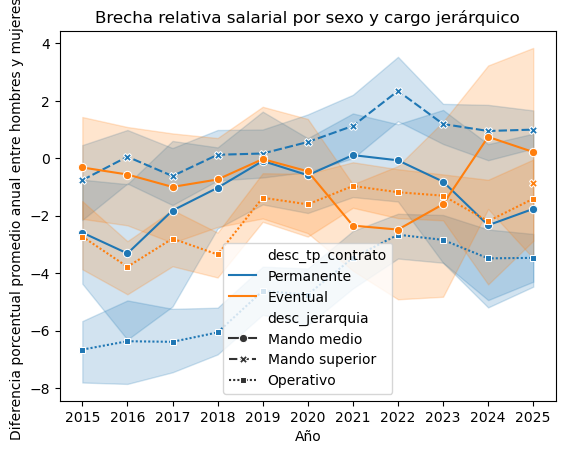

In [147]:
#scatter plot
sns.lineplot(data=brecha_oj, x='año', y='brecha_relativa_%',  hue='desc_tp_contrato', style='desc_jerarquia', markers=True)
plt.title("Brecha relativa salarial por sexo y cargo jerárquico")
plt.ylabel("Diferencia porcentual promedio anual entre hombres y mujeres ")
plt.xlabel("Año")
plt.show()

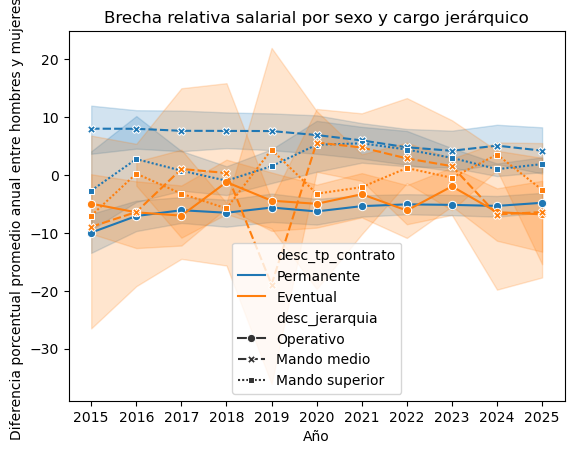

In [155]:
#scatter plot
sns.lineplot(data=brecha_AA, x='año', y='brecha_relativa_%',  hue='desc_tp_contrato', style='desc_jerarquia', markers=True)
plt.title("Brecha relativa salarial por sexo y cargo jerárquico")
plt.ylabel("Diferencia porcentual promedio anual entre hombres y mujeres ")
plt.xlabel("Año")
plt.show()